In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


In [11]:
# 데이터 로드
data = pd.read_csv('Mall_Customers.csv')

# 필요한 열 선택 및 결측값 처리
data = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].dropna()

# 데이터 스케일링
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

C:\Users\StrawberrySwing\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\StrawberrySwing\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\StrawberrySwing\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\StrawberrySwing\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans 

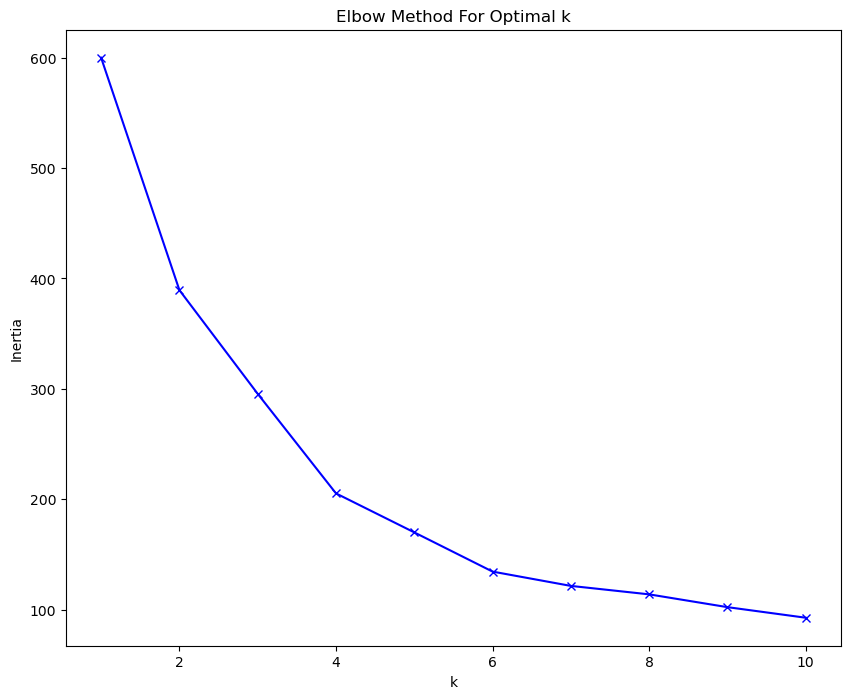

C:\Users\StrawberrySwing\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [12]:
# 최적의 k 찾기 (엘보우 방법)
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
# 엘보우 그래프 그리기
plt.figure(figsize=(10, 8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# k=5로 모델 생성 및 학습
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data_scaled)

# 군집 결과 할당
data['Cluster'] = kmeans.labels_


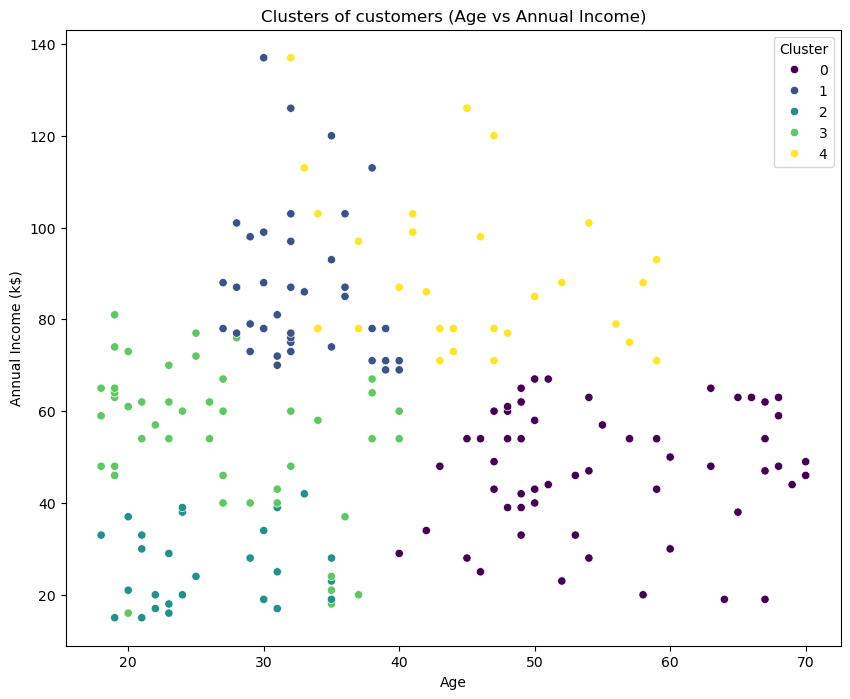

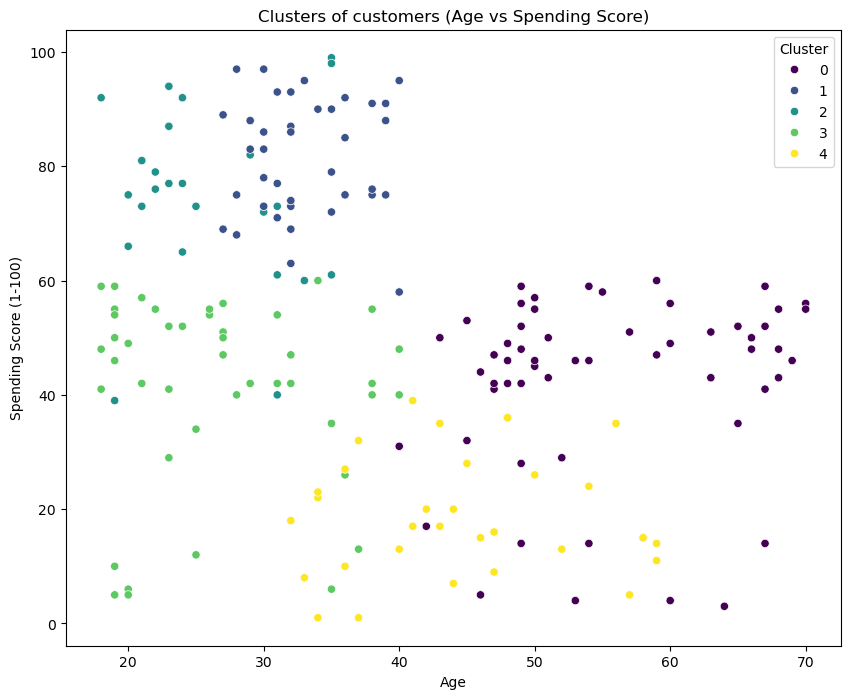

In [13]:
# 2차원으로 군집 시각화 (연령 vs 소득)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data['Age'], y=data['Annual Income (k$)'], hue=data['Cluster'], palette='viridis')
plt.title('Clusters of customers (Age vs Annual Income)')
plt.show()

# 2차원으로 군집 시각화 (연령 vs 지출 점수)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data['Age'], y=data['Spending Score (1-100)'], hue=data['Cluster'], palette='viridis')
plt.title('Clusters of customers (Age vs Spending Score)')
plt.show()

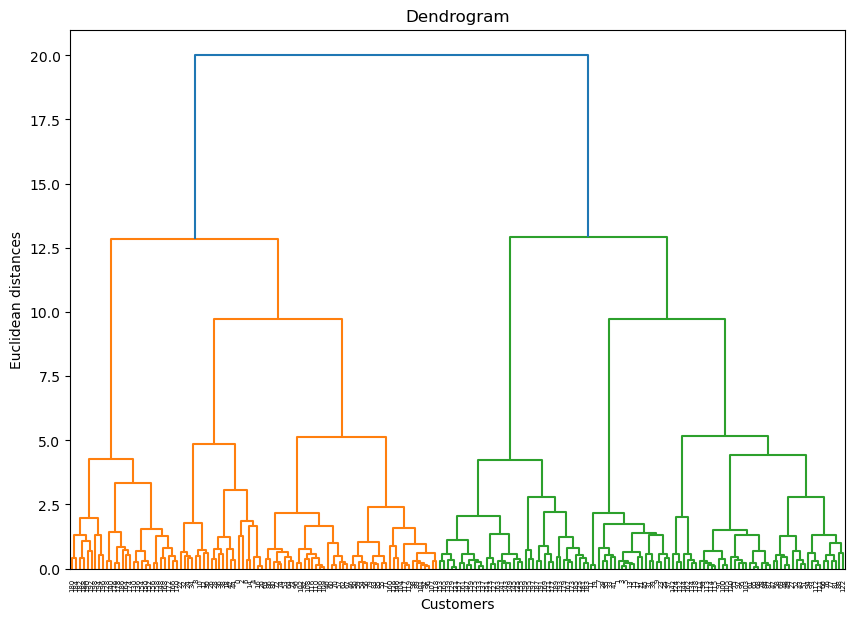

In [14]:
# 덴드로그램 생성
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

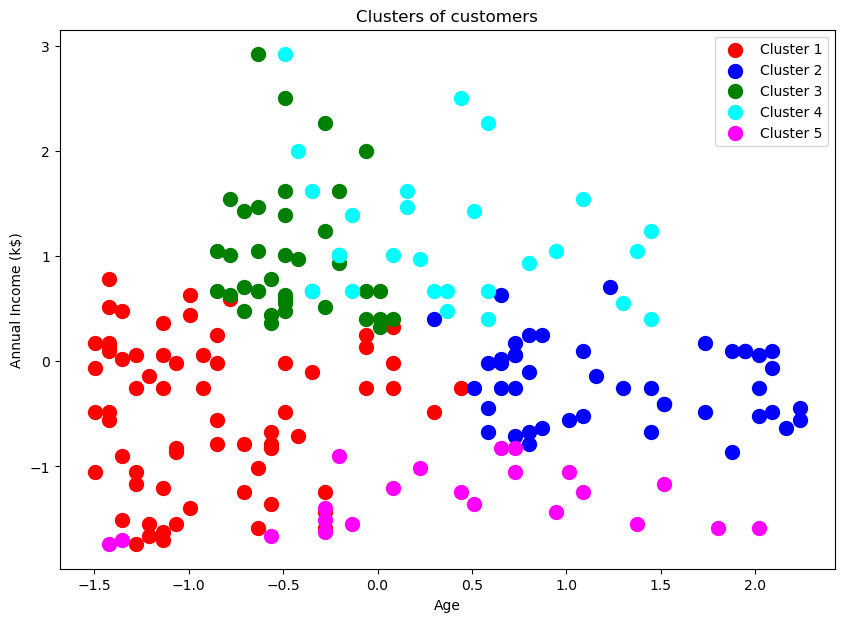

In [17]:
# 계층적 군집화 모델 생성
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')

# 모델 학습 및 예측
y_hc = hc.fit_predict(data_scaled)

# 결과 시각화
plt.figure(figsize=(10, 7))
plt.scatter(data_scaled[y_hc == 0, 0], data_scaled[y_hc == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(data_scaled[y_hc == 1, 0], data_scaled[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(data_scaled[y_hc == 2, 0], data_scaled[y_hc == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(data_scaled[y_hc == 3, 0], data_scaled[y_hc == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(data_scaled[y_hc == 4, 0], data_scaled[y_hc == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()

In [18]:
from sklearn.metrics import silhouette_score

# 실루엣 점수 계산
silhouette_avg = silhouette_score(data_scaled, y_hc)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.39002826186267214
